# Lab 15: AVL Trees

## <font color=DarkRed>Your Exercise: Compare the performance of an unbalanced Binary Search Tree vs. a self-balancing AVL Tree</font>

Use the `BinarySearchTree`, `TreeNode`, `AVLTree`, and `AVLTreeNode` classes as found in our [class notebook on this topic](http://www.pas.rochester.edu/~rsarkis/csc162/_static/notebooks/14-Binary%20Search%20Trees/Binary%20Search%20and%20AVL%20Trees.ipynb).

The worst-case performance of both those structures is listed below.

| operation | Binary Search Tree |    AVL Tree__  |
| --------- | ------------------ | -------------- | 
| put 	    | $O(n)$             | $O(log_2 n)$   |
| get 	    | $O(n)$             | $O(log_2 n)$   |
| in 	    | $O(n)$             | $O(log_2 n)$   |
| del 	    | $O(n)$             | $O(log_2 n)$   |


**Your task:** Do your best to test the run time complexity of these operations on these two types of trees. This means:

   * Concoting some set of data to input into the trees (perhaps my previous word examples)
   
   * Using timer objects
   
   * Plots

## <font color=green>Your Solution</font>

*Use a variety of code, Markdown (text) cells below to create your solution. Nice outputs would be timing results, and even plots. You will be graded not only on correctness, but the clarity of your code, descriptive text and other output. Keep it succinct!*

In [63]:
class BinarySearchTree:
    def __init__(self):  # root and size as two primary variables
        self.root = None
        self.size = 0
        
    def length(self):  # Here length is a variable 
        return self.size
    
    def __len__(self): # Here length is used as a function override len()  len(bst) === bst.length()
        return self.length()
    
    def __iter__(self): # Construct loops behind the scenes
        return self.root.__iter__()# Call iter from the treenode
    
    def put(self, key, val): # Add the node (has root or not)
        if self.root: # True
            self.__put(key, val, self.root)# Call
        else: # None===False
            self.root = TreeNode(key, val)
            
        self.size += 1
        
    def __put(self, key, val, current_node): # when put with the root--find the position
        #print("Called from BinarySearchTree class")
        if key < current_node.key:        
            if current_node.has_left_child():# put the value to the left 
                self.__put(key, val, current_node.left_child)
            else:
                current_node.left_child = TreeNode(key, val, parent=current_node)  # base case 
        else: # key is >= than current_node.key
            if current_node.has_right_child(): #put the value to the left 
                self.__put(key, val, current_node.right_child)
            else:
                current_node.right_child = TreeNode(key, val, parent=current_node)  # base case
                
    def __setitem__(self, k, v): # Set the new value 
        self.put(k, v)
        
    def get(self, key):
        if self.root:
            res = self.__get(key, self.root)# find the key as the root 
            if res:
                return res.payload #get the value of the root node
            else:
                return None
        else: 
            return None
        
    def __get(self, key, current_node): # find the matching key and retrieve the value
        if not current_node: # No such key exist 
            return None
        elif current_node.key == key: # matching key 
            return current_node 
        elif key < current_node.key: # Key< current node
            return self.__get(key, current_node.left_child)
        else:
            return self.__get(key, current_node.right_child) # Key>=current node 
        
    def __getitem__(self, key):
        return self.get(key) # get the key of the item
    
    
    def __contains__(self, key):
        if self.__get(key, self.root):
            return True
        else:
            return False
        
        #return bool(self.__get(key, self.root))
        #return True if self.__get(key, self.root) else False
        
    def delete(self, key): # 1. key in the tree 2. key size 
        if self.size > 1:
            node_to_remove = self.__get(key, self.root) # find the key
            if node_to_remove: # has the node_to_remove
                self.remove(node_to_remove)  # TODO: 'remove' needs to be defined!
                self.size -= 1
            else: # not the node_to_remove
                raise KeyError('Key not in tree') # self.size 
        elif self.size == 1 and self.root.key == key: # one node, make sure it is the key and set it none
            self.root = None
            self.size -=1
        else:
            raise KeyError('Key not in tree') # no tree
            
    def __delitem__(self, key):
        self.delete(key)
        
    
    def remove(self, current_node):
        if current_node.is_leaf():  # leaf
            if current_node == current_node.parent.left_child:
                current_node.parent.left_child = None
            else:
                current_node.parent.right_child = None
        elif current_node.has_both_children():  # both children interior
            succ = current_node.find_successor()
            succ.splice_out() # delete the successor 
            current_node.key = succ.key
            current_node.payload = succ.payload

        else:  # this node has one child
            if current_node.has_left_child(): # left child
                if current_node.is_left_child():
                    current_node.left_child.parent = current_node.parent
                    current_node.parent.left_child = current_node.left_child
                elif current_node.is_right_child(): # right child 
                    current_node.left_child.parent = current_node.parent
                    current_node.parent.right_child = current_node.left_child
                else: # no parent replace the key, value, left and right child 
                    current_node.replace_node_data(current_node.left_child.key,
                                                   current_node.left_child.payload,
                                                   current_node.left_child.left_child,
                                                   current_node.left_child.right_child)
            else:#current node has right child 
                if current_node.is_left_child(): 
                    current_node.right_child.parent = current_node.parent
                    current_node.parent.left_child = current_node.right_child
                elif current_node.is_right_child():
                    current_node.right_child.parent = current_node.parent
                    current_node.parent.right_child = current_node.right_child
                else:
                    current_node.replace_node_data(current_node.right_child.key,
                                                   current_node.right_child.payload,
                                                   current_node.right_child.left_child,
                                                   current_node.right_child.right_child)

In [70]:
# Define TreeNode        
class TreeNode:  # Use to gurantee the tree is not empty 
    def __init__(self, key, val, left=None, right=None, parent=None):
        self.key = key
        self.payload = val
        self.left_child = left
        self.right_child = right
        self.parent = parent
        
    def has_left_child(self):
        return self.left_child
    
    def has_right_child(self):
        return self.right_child
    
    def is_left_child(self):
        return self.parent and self.parent.left_child == self # has parent and parent's left_child is self
    
    def is_right_child(self):
        return self.parent and self.parent.right_child == self # has parent and parent's right_child is self

    def is_root(self):
        return not self.parent
    
    def is_leaf(self):
        return not (self.right_child or self.left_child)
    
    def has_any_children(self):
        return self.right_child or self.left_child
    
    def has_both_children(self):
        return self.right_child and self.left_child
        
    def replace_node_data(self, key, value, lc, rc):
        self.key = key
        self.payload = value
        self.left_child = lc
        self.right_child = rc
        
        if self.has_left_child():
            self.left_child.parent = self
            
        if self.has_right_child():
            self.right_child.parent = self
            
    def __iter__(self):
        # inorder traversal of (sub-)tree
        # left children, root (self), right children
        if self:
            if self.has_left_child():
                for elem in self.left_child:
                    yield elem
                    
            yield self.key
            
            if self.has_right_child():
                for elem in self.right_child:
                    yield elem
                    
                    
                    
    def splice_out(self):
        if self.is_leaf(): # left node 
            if self.is_left_child(): # left leaf node 
                self.parent.left_child = None
            else:
                self.parent_right_child = None
        elif self.has_any_children():
            
            if self.has_left_child(): # has left child 
                if self.is_left_child(): # is left child 
                    self.parent.left_child = self.left_child
                else:
                    self.parent_right_child = self.left_child
                    
                self.left_child.parent = self.parent
            else: 
                if self.is_left_child():
                    self.parent.left_child = self.right_child
                else:
                    self.parent.right_child = self.right_child
                    
                self.right_child.parent = self.parent
                
                
    def find_successor(self):
        succ = None
        if self.has_right_child(): # find the smallest value in the right child 
            succ = self.right_child.find_min()
        else:#has left child 
            if self.parent: # left child becomes the parent 
                if self.is_left_child():# is the left child 
                    succ = self.parent
                else: # is right child and has no child-find the successor in the right subtree
                    self.parent.right_child = None
                    succ = self.parent.find_successor()
                    self.parent.right_child = self
                    
        return succ
    
    def find_min(self):
        current = self
        
        while current.has_left_child():
            current = current.left_child
            
        return current

In [71]:
# Define AVL Tree 
class AVLTreeNode(TreeNode):
    def __init__(self, *args, **kwargs): # Use the args or kwargs to represent lists and dictionary
        super().__init__(*args, **kwargs)
        self.balance_factor = 0 # For AVL Tree

In [72]:
# Define AVL Tree 
class AVLTree(BinarySearchTree):
    def __init__(self):
        super().__init__() 
        
    def put(self, key, val):
        if self.root:
            self.__put(key, val, self.root)
        else:
            self.root = AVLTreeNode(key, val)
            
        self.size += 1
        
    def __put(self, key, val, current_node):
        if key < current_node.key:
            if current_node.has_left_child():
                self.__put(key,val,current_node.left_child)
            else:
                current_node.left_child = AVLTreeNode(key,val,parent=current_node)
                self.update_balance(current_node.left_child)
        else:
            if current_node.has_right_child():
                self.__put(key,val,current_node.right_child)
            else:
                current_node.right_child = AVLTreeNode(key,val,parent=current_node)
                self.update_balance(current_node.right_child)     

    def update_balance(self, node):
        if node.balance_factor > 1 or node.balance_factor < -1:
            self.rebalance(node)
            return
        
        if node.parent != None:
            if node.is_left_child():
                node.parent.balance_factor += 1
            elif node.is_right_child():
                node.parent.balance_factor -= 1

            if node.parent.balance_factor != 0:
                self.update_balance(node.parent)

    def rebalance(self, node):
        if node.balance_factor < 0:
            if node.right_child.balance_factor > 0:
                # Do an LR Rotation
                self.rotate_right(node.right_child)
                self.rotate_left(node)
            else:
                # single left
                self.rotate_left(node)
        elif node.balance_factor > 0:
            if node.left_child.balance_factor < 0:
                # Do an RL Rotation
                self.rotate_left(node.left_child)
                self.rotate_right(node)
            else:
                # single right
                self.rotate_right(node)

    def rotate_left(self,rot_root):
        new_root = rot_root.right_child
        rot_root.right_child = new_root.left_child
        
        if new_root.left_child != None:
            new_root.left_child.parent = rot_root
            
        new_root.parent = rot_root.parent
        
        if rot_root.is_root():
            self.root = new_root
        else:
            if rot_root.is_left_child():
                rot_root.parent.left_child = new_root
            else:
                rot_root.parent.right_child = new_root

        new_root.left_child = rot_root
        rot_root.parent = new_root
        rot_root.balance_factor = rot_root.balance_factor + 1 - min(new_root.balance_factor, 0)
        new_root.balance_factor = new_root.balance_factor + 1 + max(rot_root.balance_factor, 0)


    def rotate_right(self,rot_root):
        new_root = rot_root.left_child
        rot_root.left_child = new_root.right_child
        if new_root.right_child != None:
            new_root.right_child.parent = rot_root
        new_root.parent = rot_root.parent
        if rot_root.is_root():
            self.root = new_root
        else:
            if rot_root.is_right_child():
                rot_root.parent.right_child = new_root
            else:
                rot_root.parent.left_child = new_root
        new_root.right_child = rot_root
        rot_root.parent = new_root
        rot_root.balance_factor = rot_root.balance_factor - 1 - max(new_root.balance_factor, 0)
        new_root.balance_factor = new_root.balance_factor - 1 + min(rot_root.balance_factor, 0)

In [73]:
import requests
import timeit 
import random

req = requests.get("http://t2.hhg.to/ospd.txt")
words = req.text.split("\n")
total_word = len(words)

## TESTING-PUT


In [80]:
# Make a dictionary to select the random sample 
def make_dictionary(n):
    wl = []
    gap = total_word//n
    for i,word in enumerate(words):
        if i%gap==0:
            wl.append(word)
    return wl

# Put the sample words into two trees: AVL and BST 
def fillAtree(wl):
    Atree = AVLTree()
    for word in wl:
        Atree.put(word, "No definition available") 
    return Atree

def fillBtree(wl):
    Btree = BinarySearchTree()
    for word in wl:
        Btree.put(word, "No definition available") 
    return Btree

In [81]:
# Build dictionary to plot the time for both trees
Atree_times = dict()
Btree_times = dict()

# Set the range for n size numbers 
for n in range(200, 3000, 300):
    wl = make_dictionary(n)
    Atree = fillAtree(wl)
    Btree = fillBtree(wl)
    # Time two tree algorithms with the same word dictionary
    Atree_t = timeit.Timer("Atree.put('zloha','No definition available') ", globals={"Atree":Atree})
    Atree_times[n] = Atree_t.timeit(20) 
    Btree_t = timeit.Timer("Btree.put('zloha','No definition available') ", globals={"Btree":Btree})
    Btree_times[n] = Btree_t.timeit(20) 


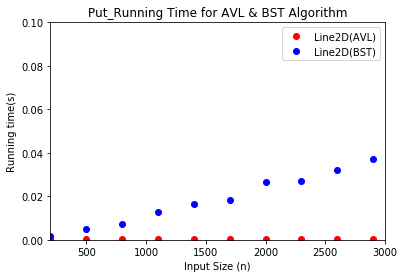

In [82]:
# Plot the running time for two tree algorithms
import matplotlib.pyplot as plt
l1,=plt.plot(Atree_times.keys(), Atree_times.values(), 'ro',label="AVL")
l2,=plt.plot(Btree_times.keys(),Btree_times.values(), 'bo',label="BST")

plt.axis([200,3000,0,0.1])
plt.title("Put_Running Time for AVL & BST Algorithm")
plt.xlabel("Input Size (n)")
plt.ylabel("Running time(s)")
legend=plt.legend([l1,l2])
plt.show()

## TESTING GET

In [85]:
# Build two functions to get random words
def getAtree(Atree):
    randomWordIndex = random.randint(0,total_word-1)
    Atree.get(words[randomWordIndex])

def getBtree(Btree):
    randomWordIndex = random.randint(0,total_word-1)
    Btree.get(words[randomWordIndex])

In [86]:
# Make dictionaries to plot the time for both trees
Atree_times = dict()
Btree_times = dict()

# set the range for n size numbers and make the tree
for n in range(200, 3000, 300):
    wl = make_dictionary(n)
    Atree = fillAtree(wl)
    Btree = fillBtree(wl)
    # Time two tree algorithms with the same word dictionary
    Atree_t = timeit.Timer("getAtree(Atree)", globals={"getAtree":getAtree,"Atree":Atree})
    Atree_times[n] = Atree_t.timeit(20) 
    Btree_t = timeit.Timer("getBtree(Btree)", globals={"getBtree":getAtree,"Btree":Btree})
    Btree_times[n] = Btree_t.timeit(20) 


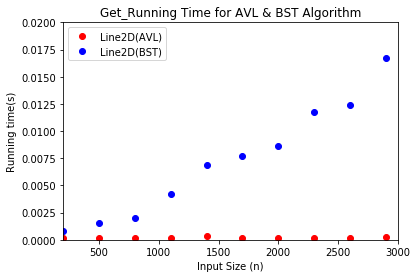

In [87]:
# Plot the running time for two tree algorithms
import matplotlib.pyplot as plt
l1,=plt.plot(Atree_times.keys(), Atree_times.values(), 'ro',label="AVL")
l2,=plt.plot(Btree_times.keys(),Btree_times.values(), 'bo',label="BST")

plt.axis([200,3000,0,0.02])
plt.title("Get_Running Time for AVL & BST Algorithm")
plt.xlabel("Input Size (n)")
plt.ylabel("Running time(s)")
legend=plt.legend([l1,l2])
plt.show()

## TESTING IN

In [88]:
# Build two functions to get random words and check if these words are in the trees
def inAtree(Atree):
    randomWordIndex = random.randint(0,total_word-1)  
    Atree.__contains__(words[randomWordIndex])

def inBtree(Btree):
    randomWordIndex = random.randint(0,total_word-1)  
    Btree.__contains__(words[randomWordIndex])

In [89]:
# Build dictionary to plot the time for both trees
Atree_times = dict()
Btree_times = dict()

# set the range for n size numbers 
for n in range(200, 3000, 300):
    wl = make_dictionary(n)
    Atree = fillAtree(wl)
    Btree = fillBtree(wl)

    # Time two tree algorithms with the same word dictionary
    Atree_t = timeit.Timer("inAtree(Atree)", globals={"inAtree":inAtree,"Atree":Atree})
    Atree_times[n] = Atree_t.timeit(2000) 
    Btree_t = timeit.Timer("inBtree(Btree)", globals={"inBtree":inBtree,"Btree":Btree})
    Btree_times[n] = Btree_t.timeit(2000) 


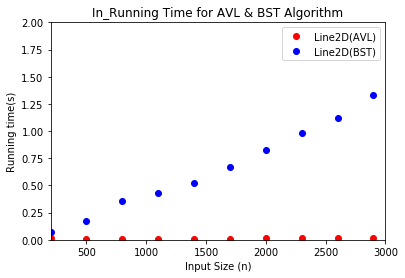

In [90]:
# Plot the running time for two tree algorithms
import matplotlib.pyplot as plt
l1,=plt.plot(Atree_times.keys(), Atree_times.values(), 'ro',label="AVL")
l2,=plt.plot(Btree_times.keys(),Btree_times.values(), 'bo',label="BST")

plt.axis([200, 3000,0,2])
plt.title("In_Running Time for AVL & BST Algorithm")
plt.xlabel("Input Size (n)")
plt.ylabel("Running time(s)")
legend=plt.legend([l1,l2])
plt.show()

## TESTING DEL

In [101]:
# Make a dictionary for deleting the word in AVL and BST tree

def delAtree(Atree,item):
    Atree.delete(item)

def delBtree(Btree,item):
    Btree.delete(item)
    

## #1 Worst Case: Delete a random word 

In [104]:
# Build dictionary to plot the time for both trees
Atree_times = dict()
Btree_times = dict()

# set the range for n size numbers and build teh tree
for n in range(200, 3000, 300):
    wl = make_dictionary(n)
    Atree = fillAtree(wl)
    Btree = fillBtree(wl)
    randomWordIndex = random.randint(0,len(wl)-1) 
    # delete a random word 
    del_item = wl[randomWordIndex]
    # Time two tree algorithms with the same word dictionary
    Atree_t = timeit.Timer("delAtree(Atree,item)", globals={"delAtree":delAtree,"Atree":Atree,"item":del_item})
    Atree_times[n] = Atree_t.timeit(1) 
    Btree_t = timeit.Timer("delBtree(Btree,item)", globals={"delBtree":delBtree,"Btree":Btree,"item":del_item})
    Btree_times[n] = Btree_t.timeit(1) 

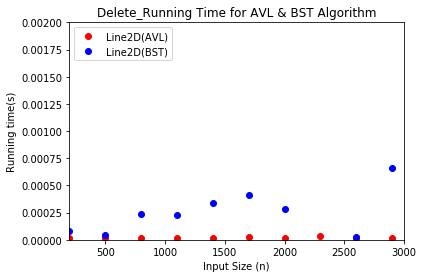

In [105]:
# Plot the running time for two tree algorithms 
import matplotlib.pyplot as plt
l1,=plt.plot(Atree_times.keys(), Atree_times.values(), 'ro',label="AVL")
l2,=plt.plot(Btree_times.keys(),Btree_times.values(), 'bo',label="BST")

plt.axis([200, 3000,0,0.002])
plt.title("Delete_Running Time for AVL & BST Algorithm")
plt.xlabel("Input Size (n)")
plt.ylabel("Running time(s)")
legend=plt.legend([l1,l2])
plt.show()

## #2 Worst Case: Delete the last word 

In [106]:
# Build dictionary to plot the time for both trees
Atree_times = dict()
Btree_times = dict()

# set the range for n size numbers and build teh tree
for n in range(200, 3000, 300):
    wl = make_dictionary(n)
    Atree = fillAtree(wl)
    Btree = fillBtree(wl)
    #randomWordIndex = random.randint(0,len(wl)) 
    # delete the last word 
    del_item = wl[-1]
    # Time two tree algorithms with the same word dictionary
    Atree_t = timeit.Timer("delAtree(Atree,item)", globals={"delAtree":delAtree,"Atree":Atree,"item":del_item})
    Atree_times[n] = Atree_t.timeit(1) 
    Btree_t = timeit.Timer("delBtree(Btree,item)", globals={"delBtree":delBtree,"Btree":Btree,"item":del_item})
    Btree_times[n] = Btree_t.timeit(1) 

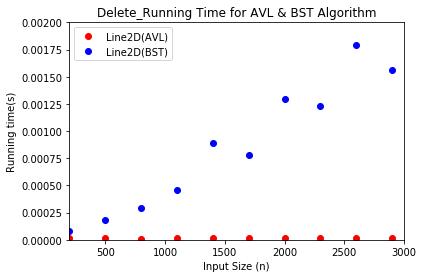

In [107]:
# Plot the running time for two tree algorithms 
import matplotlib.pyplot as plt
l1,=plt.plot(Atree_times.keys(), Atree_times.values(), 'ro',label="AVL")
l2,=plt.plot(Btree_times.keys(),Btree_times.values(), 'bo',label="BST")

plt.axis([200, 3000,0,0.002])
plt.title("Delete_Running Time for AVL & BST Algorithm")
plt.xlabel("Input Size (n)")
plt.ylabel("Running time(s)")
legend=plt.legend([l1,l2])
plt.show()